In [3]:
import numpy as np
import time
from multiprocessing import Pool
import matplotlib.pyplot as plt

In [4]:
def multiply_matrices(seed):
    np.random.seed(seed)
    A = np.random.rand(10, 10)
    B = np.random.rand(10, 10)
    return np.dot(A, B)


In [5]:
def task(num_matrices, num_threads):
    start_time = time.time()
    with Pool(num_threads) as p:
        results = p.map(multiply_matrices, range(num_matrices))
    end_time = time.time()
    total_time = end_time - start_time
    return total_time


In [6]:
num_matrices = 100
num_threads_range = range(1, 9)  # Range of number of threads
time_taken = []  # To store time taken for each number of threads


In [7]:

print("Program Started....")
# Main loop to run the task function with different numbers of threads
for num_threads in num_threads_range:
    total_time = task(num_matrices, num_threads)
    time_taken.append(total_time)

    print(f"T = {num_threads}\t\t{total_time:.2f}")

# Generate the table
print("\nThreads\t\tTime Taken(sec)")
for i in range(len(num_threads_range)):
    print(f"T = {num_threads_range[i]}\t\t{time_taken[i]:.2f}")


Program Started....


In [1]:

# if __name__ == '__main__':
#     startTime = time.time()
#     num_matrices = 100
#     num_threads_range = range(1, 9)  # Range of number of threads
#     time_taken = []  # To store time taken for each number of threads

#     print("Program Started....")

#     # Main loop to run the task function with different numbers of threads
#     for num_threads in num_threads_range:
#         total_time = task(num_matrices, num_threads)
#         time_taken.append(total_time)

#         print(f"T = {num_threads}\t\t{total_time:.2f}")

#     # Generate the table
#     print("\nThreads\t\tTime Taken(sec)")
#     for i in range(len(num_threads_range)):
#         print(f"T = {num_threads_range[i]}\t\t{time_taken[i]:.2f}")



NameError: name 'time' is not defined

In [2]:
    # Generate the graph
plt.plot(num_threads_range, time_taken, marker='o')
plt.xlabel('Threads')
plt.ylabel('Time Taken (sec)')
plt.title('Number of Threads vs Time Taken')
plt.grid(True)
plt.show()
print("Total Time %f sec" % (round(time.time() - startTime, 4)))


NameError: name 'plt' is not defined

+------------------+---------+--------+---------+---------+---------+---------+---------+---------+
| Threads          | T=1     | T=2    | T=3     | T=4     | T=5     | T=6     | T=7     | T=8     |
+------------------+---------+--------+---------+---------+---------+---------+---------+---------+
| Time taken (sec) | 37.1413 | 27.423 | 30.6781 | 23.4251 | 17.6314 | 23.4833 | 18.5982 | 25.4295 |
+------------------+---------+--------+---------+---------+---------+---------+---------+---------+


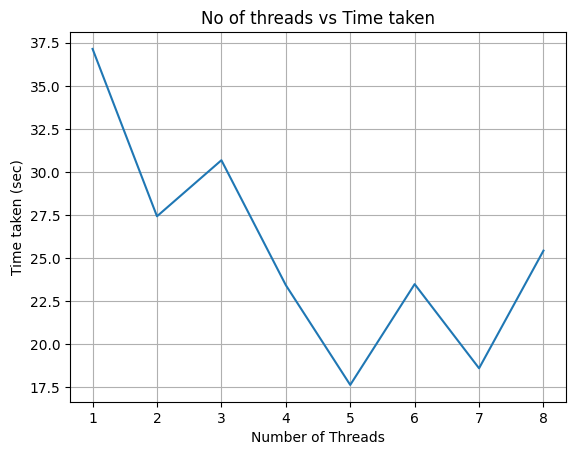

In [1]:
import numpy as np
import threading
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

def matrix_multiply(A, B, result, index):
    result[index] = np.dot(A, B)

def run_with_threads(num_threads):
    start_time = time.time()
    threads = []
    chunk_size = len(matrices) // num_threads
    for i in range(num_threads):
        start_index = i * chunk_size
        end_index = start_index + chunk_size if i < num_threads - 1 else len(matrices)
        thread = threading.Thread(target=matrix_multiply_batch, args=(A, matrices[start_index:end_index], results, start_index))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

def matrix_multiply_batch(A, matrices_batch, results, start_index):
    for i, matrix in enumerate(matrices_batch):
        matrix_multiply(A, matrix, results, start_index + i)

A = np.random.rand(1000, 1000) # constant matrix
results = [None] * 100
matrices = [np.random.rand(1000, 1000) for _ in range(100)]  # random matrices

results_table = []
num_threads = [1, 2, 3, 4, 5, 6, 7, 8]
time_taken = []

for num_t in num_threads:
    ttime = run_with_threads(num_t)
    time_taken.append(ttime)
    results_table.append(("T="+str(num_t), round(ttime, 4)))

ans = list(zip(*results_table))

print(tabulate(ans, tablefmt="grid", showindex=["Threads", "Time taken (sec)"]))

plt.plot(num_threads, time_taken)
plt.xlabel('Number of Threads')
plt.ylabel('Time taken (sec)')
plt.title('No of threads vs Time taken')
plt.xticks(num_threads)
plt.grid(True)
plt.show()